# <div style="color:#fff;display:fill;border-radius:10px;background-color:#3c968b;text-align:left;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">🔥 Intro to PyTorch in 10 Notebook Code Cells</div>

Welcome to this quick introduction to PyTorch! This ML/DL framework released by Facebook (Meta) 7 years ago is currently behind all OpenAI's models (**GTP-3, GPT-4, Dalle**, etc.), **Tesla's Autopilot**, **Stable Diffusion**, and many other popular (and not so popular but industry wide) and important AI systems. 


### 📹 YouTube video: 
https://www.youtube.com/watch?v=W5zg2Cw4VB8 

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/W5zg2Cw4VB8/0.jpg)](https://www.youtube.com/watch?v=W5zg2Cw4VB8)

The other big player in the Deep Learning Frameworks arena is Tensorflow (Google) which was released around 2015 and was the most popular one until these recent years.

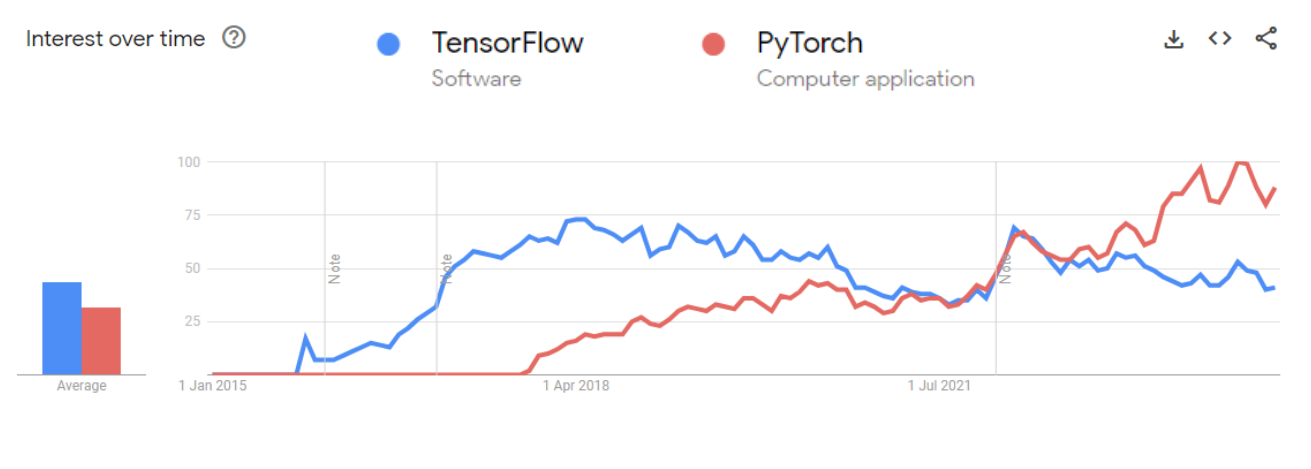

With PyTorch we can create, train and serve Machine Learning and Deep Learning models flexibly, for many different use cases: from Language Models, to Computer Vision predicting on image, detect cancer on DNA, classify audio files or even predict the next week's weather with Time Series data to name some random examples...

In this tutorial, we'll cover the basics of **PyTorch in just 10 code cells**.

⬆️ Consider upvoting this Notebook if you like it 🤗.  

By the end, you'll have a good understanding of how to use PyTorch for basic tasks. Let's get started!

--------


## <div style="color:#fff;display:fill;border-radius:10px;background-color:#3c968b;text-align:left;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%"> 📋 Table of Contents</div>

* [1. Install and Import torch](#section-1)
* [2. Tensors](#section-2)
* [3. Tensor Operations](#section-3)
* [4. Automatic Differentiation](#section-4) 
* [5. Datasets and Dataloaders](#section-5)
* [6. Neural Networks](#section-6)
* [7. Loss Function and Optimizer](#section-7) 
* [8. Training Loop](#section-8) 
* [9. GPU Support](#section-9) 
* [10. Saving, Loading, and using Models](#section-10) 

<a id="section-1"></a>
## <div style="color:#fff;display:fill;border-radius:10px;background-color:#3c968b;text-align:left;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">1. Install and Import torch</div>

First, we will need to install **torch** (this is how it's called the Python package for PyTorch, it can be a little bit confusing). But, luckily, it's already installed in Kaggle's Notebooks environment.

Otherwise, you can get the exact pip command for instlling it in your system from here: https://pytorch.org/get-started/locally/

Now, we can already import it in our Notebook (or python script). 

In [1]:
# Import PyTorch library
import torch

## <a id="section-2"></a>
## <div style="color:#fff;display:fill;border-radius:10px;background-color:#3c968b;text-align:left;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">2. Tensors</div>

Tensors are the fundamental building blocks in PyTorch. They are similar to NumPy arrays but can also be used on a GPU to accelerate computing. In PyTorch, tensors can represent various components of a neural network, including weights, biases, inputs (like images, audios, text embeddings, etc), and outputs. Let's create a simple tensor.

In [2]:
# Create a 2D tensor
tensor = torch.tensor([[1, 2], [3, 4]])
print(tensor)

tensor([[1, 2],
        [3, 4]])


<a id="section-3"></a>
## <div style="color:#fff;display:fill;border-radius:10px;background-color:#3c968b;text-align:left;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">3. Tensor Operations</div>

PyTorch supports a variety of tensor operations. Let's perform some basic operations like addition, multiplication, and matrix multiplication.

In [3]:
tensor

tensor([[1, 2],
        [3, 4]])

In [15]:
tensor[0, 1]

tensor(2)

In [4]:
# Basic tensor operations
tensor_add = tensor + tensor
tensor_mul = tensor * tensor
tensor_matmul = torch.matmul(tensor, tensor)

print("Addition:\n", tensor_add)
print("Element-wise Multiplication:\n", tensor_mul)
print("Matrix Multiplication:\n", tensor_matmul)

Addition:
 tensor([[2, 4],
        [6, 8]])
Element-wise Multiplication:
 tensor([[ 1,  4],
        [ 9, 16]])
Matrix Multiplication:
 tensor([[ 7, 10],
        [15, 22]])


In [12]:
# Inverse of a tensor matrix
torch.linalg.inv(tensor.float())

tensor([[-2.0000,  1.0000],
        [ 1.5000, -0.5000]])

<a id="section-4"></a>
## <div style="color:#fff;display:fill;border-radius:10px;background-color:#3c968b;text-align:left;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">4. Automatic Differentiation</div>

One of the key features of PyTorch is its automatic differentiation capability. This is essential for training neural networks helping the internal parameters of those to be optimized by decreasing their error following the gradient descent algorithm. Let's see how it works.

In [31]:
# Enable gradient tracking
x = torch.tensor(2.0, requires_grad=True)

y = x**2

# Compute gradients
y.backward()

# Access and print the gradient
print("Gradient of y with respect to x:", x.grad)

Gradient of y with respect to x: tensor(4.)


In [36]:
x = torch.tensor(2.0, requires_grad=True)
y = x**2

# Retain the computational graph
y.backward(retain_graph=True)
print("Gradient of y with respect to x:", x.grad)

# Now you can continue building the graph
z = y*2
z.backward()
print("Final gradient:", x.grad)  # This will be accumulated!

Gradient of y with respect to x: tensor(4.)
Final gradient: tensor(12.)


In [34]:
x = torch.tensor(2.0, requires_grad=True)

# First computation
y = x**2
y.backward(retain_graph=True)
grad_y = x.grad.clone()  # Save gradient
x.grad.zero_()  # Clear for next computation

# Second computation
z = x**3
z.backward(retain_graph=True)
grad_z = x.grad.clone()  # Save gradient
x.grad.zero_()  # Clear for next computation

# Third computation
w = x**4
w.backward()
grad_w = x.grad.clone()

print(f"Gradient of y=x²: {grad_y}")
print(f"Gradient of z=x³: {grad_z}")
print(f"Gradient of w=x⁴: {grad_w}")

Gradient of y=x²: 4.0
Gradient of z=x³: 12.0
Gradient of w=x⁴: 32.0


<a id="section-5"></a>
## <div style="color:#fff;display:fill;border-radius:10px;background-color:#3c968b;text-align:left;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">5. Datasets and Dataloaders</div>

PyTorch **Datasets** provide an abstraction for accessing and manipulating data, allowing users to define how data is loaded and preprocessed. 

**DataLoaders** facilitate the efficient loading of data in batches, enabling shuffling, parallel data loading, and easy iteration over the dataset during training or evaluation. 

Together, they streamline the process of feeding data into machine learning models.

In [42]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd


# Generating a simple example dataset dataframe
data = {
    "feature1": [0.5, 1.5, 2.5, 3.5, 4.5, 6.0],
    "feature2": [1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
    "feature3": [1.5, 2.5, 3.5, 4.5, 5.5, 7.0],
    "target": [2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
}

df = pd.DataFrame(data)

# Dataset
class CustomDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.features = dataframe.drop("target", axis=1).values
        self.targets = dataframe["target"]

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        features = torch.tensor(self.features[idx], dtype=torch.float32)
        target = torch.tensor(self.targets[idx], dtype=torch.float32)
        return features, target

# Create an instance of the dataset
dataset = CustomDataset(df)
print(f"The dataset has {len(dataset)} samples")


# Dataloader
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Checking one batch of the dataloader
dataiter = iter(dataloader)
sample_X, sample_y = next(dataiter)
print(f"\n\nSample batch: \n\nX: {sample_X} \n\nY: {sample_y}")

The dataset has 6 samples


Sample batch: 

X: tensor([[6.0000, 6.0000, 7.0000],
        [4.5000, 5.0000, 5.5000]]) 

Y: tensor([7., 6.])


<a id="section-6"></a>
## <div style="color:#fff;display:fill;border-radius:10px;background-color:#3c968b;text-align:left;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">6. Neural Networks</div>

PyTorch provides a module called `torch.nn` to help us build neural networks. Let's create a simple feedforward neural network.

In [43]:
import torch.nn as nn

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Declaring the layers to use
        self.fc1 = nn.Linear(3, 2)
        self.fc2 = nn.Linear(2, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Defining the connections and data flow across layers in the model
        # (2 inputs, 4 hidden neurons + ReLu, 1 output target)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Instantiate the network
model = SimpleNN()
print(model)

SimpleNN(
  (fc1): Linear(in_features=3, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=1, bias=True)
  (relu): ReLU()
)


<a id="section-7"></a>
## <div style="color:#fff;display:fill;border-radius:10px;background-color:#3c968b;text-align:left;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">7. Loss Function and Optimizer</div>

To train a neural network, we need a loss function and an optimizer. PyTorch provides several built-in loss functions and optimizers.

In [44]:
import torch.optim as optim

# Defining a Loss Function, we use the Mean Squared Error in this case
criterion = nn.MSELoss()

# Defining an Optimizer function, we use Stochastic Gradient Descent
optimizer = optim.SGD(model.parameters(), lr=0.005)

<a id="section-8"></a>
## <div style="color:#fff;display:fill;border-radius:10px;background-color:#3c968b;text-align:left;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">8. Training Loop</div>

Now, let's put everything together and create a simple training loop to train our neural network.

In [9]:
# Training loop
for epoch in range(10):
    print(f"---- Epoch {epoch+1} ----")
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(X).squeeze()  # Forward pass
        loss = criterion(outputs, y)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        print(f"Batch {batch+1}, Loss: {loss}")    

---- Epoch 1 ----
Batch 1, Loss: 20.960561752319336
Batch 2, Loss: 3.146069049835205
Batch 3, Loss: 4.155816078186035
---- Epoch 2 ----
Batch 1, Loss: 1.3717117309570312
Batch 2, Loss: 0.7957733869552612
Batch 3, Loss: 0.26551929116249084
---- Epoch 3 ----
Batch 1, Loss: 0.47072434425354004
Batch 2, Loss: 0.2556460499763489
Batch 3, Loss: 0.1651814877986908
---- Epoch 4 ----
Batch 1, Loss: 0.29702743887901306
Batch 2, Loss: 0.42049962282180786
Batch 3, Loss: 0.21511013805866241
---- Epoch 5 ----
Batch 1, Loss: 0.21181106567382812
Batch 2, Loss: 0.692445695400238
Batch 3, Loss: 0.11142219603061676
---- Epoch 6 ----
Batch 1, Loss: 0.17200788855552673
Batch 2, Loss: 0.3765263855457306
Batch 3, Loss: 0.35831156373023987
---- Epoch 7 ----
Batch 1, Loss: 0.4123519957065582
Batch 2, Loss: 0.27047765254974365
Batch 3, Loss: 0.09276825189590454
---- Epoch 8 ----
Batch 1, Loss: 0.5590462684631348
Batch 2, Loss: 0.21444827318191528
Batch 3, Loss: 0.14242006838321686
---- Epoch 9 ----
Batch 1, Los

<a id="section-9"></a>
## <div style="color:#fff;display:fill;border-radius:10px;background-color:#3c968b;text-align:left;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">9. GPU Support</div>

PyTorch makes it easy to move your computations to a GPU. Let's see how to do that.

First you will need to activate the GPU in your Kaggle Notebook (you have around 30h of GPU runtime every week in your Kaggle Notebooks!). To do it, go to your right pannel menu > Session options > Accelerator > GPU P100

In [10]:
torch.cuda.is_available()

True

In [11]:
torch.cuda.device_count()

1

In [12]:
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [13]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Creating a new sample 
new_X = torch.tensor([2., 3., 3.])

# Move tensor to GPU
new_X = new_X.to(device)
print("New sample:", new_X)

# Move model to GPU
model = model.to(device)

# Inference from GPU
model.eval()
with torch.no_grad():
    pred = model(new_X)
    
print("Prediction:", pred[0])


Using device: cuda
New sample: tensor([2., 3., 3.], device='cuda:0')
Prediction: tensor(3.3321, device='cuda:0')


<a id="section-10"></a>
## <div style="color:#fff;display:fill;border-radius:10px;background-color:#3c968b;text-align:left;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">10. Saving, Loading, and using Models</div>

Saving and loading models in PyTorch is straightforward. Let's save our trained model and then load it back.

In [14]:
# Save the model as a compressed file
torch.save(model.state_dict(), "simple_nn.pth")

# Load the model
loaded_model = SimpleNN()
loaded_model.load_state_dict(torch.load("simple_nn.pth"))
print("Model loaded successfully\n")

loaded_model.to(device)

# Use the model to infer new samples
new_X = torch.tensor([4., 4.5, 5.], dtype=torch.float32)
new_X = new_X.to(device)

with torch.no_grad():
    pred = loaded_model(new_X)
    
print("Prediction:", pred)

Model loaded successfully

Prediction: tensor([5.5015], device='cuda:0')


<a id="section-11"></a>
## <div style="color:#fff;display:fill;border-radius:10px;background-color:#3c968b;text-align:left;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">Conclusion</div>

Congratulations for making it until the end! In this quick introduction, we've covered the basics of PyTorch, including tensor operations, automatic differentiation, building neural networks, training loops, GPU support, and saving/loading models. I hope this gives you a good starting point for your PyTorch journey. Happy ML training!

In [15]:
# Final message
print("Thank you for following along! Check out the full tutorial on my YouTube channel and blog.\n")
print("In the next Notebook, Blog, and Video we will se how to create and train a Computer Vision CNN model in Pytorch to predict skin cancer from images!\n")
print("Make sure to Follow me and Subscribe: https://youtube.com/@enricd if you liked this content! 🤗\n")

Thank you for following along! Check out the full tutorial on my YouTube channel and blog.

In the next Notebook, Blog, and Video we will se how to create and train a Computer Vision CNN model in Pytorch to predict skin cancer from images!

Make sure to Follow me and Subscribe: https://youtube.com/@enricd if you liked this content! 🤗

